# Washington Post Police Shooting Analysis


This project will take a look at killings that took place at the hands of police officers in the United States from the beginning of 2015 to into February 2017. The main goal is to just take a look at the data and see if there are any trends going on. The main variable I will be looking at is race.

Details about data content:
[https://github.com/washingtonpost/data-police-shootings/](http://)

# Table of Contents

* **[Abstract](#Abstract)**
* **[General Look at Dataset](#General-Look-at-Dataset)**
* **[Cleaning the Data](#Cleaning-the-Data)**
* **[Analysis of Police Shootings by Race](#Analysis-of-Police-Shootings-by-Race)**
* **[Analysis of Race vs. Age](#Analysis-of-Race-vs.-Age)**
* **[Unarmed Killings by Race](#Unarmed-Killings-by-Race)**
* **[Not Fleeing Suspects Killed by Race](#Not-Fleeing-Suspects-Killed-by-Race)**
* **[Not Fleeing and Unarmed Killed by Race](#Not-Fleeing-and-Unarmed-Killed-by-Race)**
* **[Conclusion](#Conclusion)**

# Abstract

By taking a thorough look through the race column it can be seen that there is a consistent trend going on. In all of the sections we looked at the rate was almost twice as high for the black population.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/police-shootings/database.csv


# General Look at Dataset


In [2]:
post = pd.read_csv('/kaggle/input/police-shootings/database.csv') #Importing the data

In [3]:
post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2142 entries, 0 to 2141
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2142 non-null   int64  
 1   name                     2123 non-null   object 
 2   date                     2142 non-null   object 
 3   manner_of_death          2142 non-null   object 
 4   armed                    2136 non-null   object 
 5   age                      2099 non-null   float64
 6   gender                   2141 non-null   object 
 7   race                     2039 non-null   object 
 8   city                     2142 non-null   object 
 9   state                    2142 non-null   object 
 10  signs_of_mental_illness  2142 non-null   bool   
 11  threat_level             2142 non-null   object 
 12  flee                     2106 non-null   object 
 13  body_camera              2142 non-null   bool   
dtypes: bool(2), float64(1), 

By the looks of it we have 2142 observations. There seems to be a decent amount of missing data in our set so we will want to work through cleaning up the data.

In [4]:
post.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


This data has a lot of insightful information that we can analyze. We will be looking in detail mainly at race and it's relation to other columns like armed, age, and flee. 

In [5]:
f = post['gender'] == 'F'
m = post['gender'] == 'M'
print("Killings Based on Gender")
print({'Female': sum(f), 'Male': sum(m)})

Killings Based on Gender
{'Female': 89, 'Male': 2052}


We have 89 females that were killed in this dataset and 2052 males that were killed, so for analysis we will just go ahead and keep the genders grouped together.

In [6]:
print(post.date.min())
print(post.date.max())

2015-01-02
2017-02-28


From above we can verify that this dataset is between January 2, 2015 and February 28, 2017.

# Cleaning the Data

Let's go ahead and look at how many missing values we have.

In [7]:
null_counts = post.isnull().sum()
print("The number of nulls in each column is: \n{}".format(null_counts))

The number of nulls in each column is: 
id                           0
name                        19
date                         0
manner_of_death              0
armed                        6
age                         43
gender                       1
race                       103
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        36
body_camera                  0
dtype: int64


The unfortunate part of our data is that the column with the most missing data is the race column. So we do not sway the analysis of race we are just going to take out all the observations that do not have a race associated and for the sake of a consistent dataset we will just make a new dataset that also take out missing values in the columns, "armed", "age", and "flee".

In [8]:
post_clean = post.dropna(subset=['race', 'armed', 'age', 'flee'])

In [9]:
post_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 2141
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       1986 non-null   int64  
 1   name                     1986 non-null   object 
 2   date                     1986 non-null   object 
 3   manner_of_death          1986 non-null   object 
 4   armed                    1986 non-null   object 
 5   age                      1986 non-null   float64
 6   gender                   1986 non-null   object 
 7   race                     1986 non-null   object 
 8   city                     1986 non-null   object 
 9   state                    1986 non-null   object 
 10  signs_of_mental_illness  1986 non-null   bool   
 11  threat_level             1986 non-null   object 
 12  flee                     1986 non-null   object 
 13  body_camera              1986 non-null   bool   
dtypes: bool(2), float64(1), 

# Analysis of Police Shootings by Race

To introduce the column of race more we will look at an overview of the deaths by race. The focus of this section however, is to look at the rate at which each race is being killed by police. This is more valuable information than just counting how many people from each race have been killed because we are able to weigh our information by comparing deaths by population.

We will start by just visualizing how many people separated by race were killed by police in the two year span we are analyzing. Another important bit of information is what each letter represents in our outputs. The letters correspond with the following:

* W -- White
* B -- Black
* H -- Hispanic
* A -- Asian 
* O -- Other (Not entirely clear what is included in this category)
* N -- Native American

In [10]:
post_clean.race.value_counts().sum()

1986

1986 people were killed in the dataset we are looking at.

In [11]:
post_clean.race.value_counts()

W    1022
B     523
H     355
A      32
O      28
N      26
Name: race, dtype: int64

In [12]:
post_clean.race.value_counts(normalize=True) #Proportion Based on Rest of Categories

W    0.514602
B    0.263343
H    0.178751
A    0.016113
O    0.014099
N    0.013092
Name: race, dtype: float64

Statistically the most deaths came from the White population, almost twice as much as the next race which is the Black population. Like mentioned above what has not factored in yet, are the rates based on the population of each race. For this part I'll take information from Statista that will give me the population of each race in the United States. The link will be inserted below:
[https://www.statista.com/statistics/183489/population-of-the-us-by-ethnicity-since-2000/](http://)

No populations went up exponentially between these two years, so we will just go ahead and take the population data for 2016 which says there are this many people for each race:

* White    -- 248,410,000
* Black    -- 42,970,000
* Hispanic -- 60,570,000
* Asian    -- 18,280,000
* NatAmer  -- 4,050,000

Because of uncertainty over what Other includes we will not do proportions of the 'Other' category.

In [13]:
pro = {'White':[1022/248410000], 'Black':[523/42970000], 'Hispanic':[355/60570000], 'Asian': [32/18280000], 'Native American': [26/4050000]}
prop = pd.DataFrame(data=pro)
prop

,White,Black,Hispanic,Asian,Native American
0,0.000004,0.000012,0.000006,0.000002,0.000006


This means by proportion of the population the amount of people killed from law enforcement by race is:

* White                 (.0004%)
* Black                 (.0012%)
* Hispanic              (.0006%)
* Asian                 (.0002%)
* Native American       (.0006%)

Right now these percentages don't mean a whole lot by looking at it for a couple seconds, but if looked at closely it can be seen that the rate at which the Black population is being killed is 3 times higher than the White population, and 2 times higher than the next races which are the Native American population and the Hispanic population. It seems like the lowest rate of killings is the Asian population, but besides the Black population the rates seem to be fairly close together. An easier way to visualize the rates is if we create a population of 1,000,000 people for each race and using the rates see the projected numbers of how many people would be killed by police. Also, just to look at the numbers in another way we will also set the population of the other races to the population of the White race which again was made up of 248,410,000 people in 2016.


In [14]:
gen_data = [['White', 4, 1041], ['Black', 12, 2981], ['Hispanic', 6, 1490], ['Asian', 2, 497], ['Native American', 6, 1490]]
pd.DataFrame(gen_data, columns=["Race", "Number Killed Based Off Rates (For 1 Million People)", "Number Killed Based Off Rates (For 248,410,000 people)"])

,Race,Number Killed Based Off Rates (For 1 Million People),"Number Killed Based Off Rates (For 248,410,000 people)"
0,White,4,1041
1,Black,12,2981
2,Hispanic,6,1490
3,Asian,2,497
4,Native American,6,1490


After some calculating if the Black population was the same as the White population during the two year period that was recorded the police would have killed 2,981 Black citizens. It can be shown from above that the numbers are fairly close together except that the rate of deaths of Black citizens seem to be higher than the other races, and the Asian citizens seem to be lower than the other races. It does not have the same effect looking just at numbers, so we will look at graphs illustrating these numbers.

In [15]:
rut = {'Race': ['White', 'Black', 'Hispanic', 'Asian', 'Native American'], 'OneMil' : [4,12,6,2,7], 'WhitePop' : [1041,2981,1490,497, 1739]}
rut1 = pd.DataFrame(rut, columns=['Race', 'OneMil', 'WhitePop'])

Text(0.5, 1.0, 'Killings Based Off Rates Per One Million People Over Two Years')

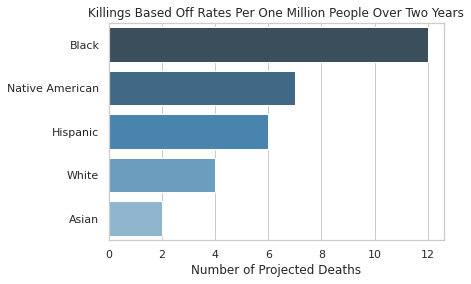

In [16]:
sns.set(style='whitegrid')
ax = sns.barplot(data=rut, y='Race', x='OneMil', palette="Blues_d", order= rut1.sort_values('WhitePop', ascending=False).Race)
plt.xlabel("Number of Projected Deaths")
plt.title("Killings Based Off Rates Per One Million People Over Two Years")

Text(0.5, 1.0, 'Killings Based Off Rates Per White Population Over Two Years')

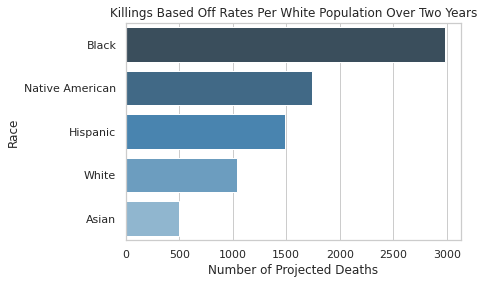

In [17]:
sns.set(style='whitegrid')
ax = sns.barplot(data=rut1, y='Race', x='WhitePop', palette="Blues_d", order= rut1.sort_values('WhitePop', ascending=False).Race)
plt.xlabel("Number of Projected Deaths")
plt.title("Killings Based Off Rates Per White Population Over Two Years")

It is  apparent that the rate that Black citizens are being killed at is much higher than any other race in the United States. From the graph the rate of Black citizens being killed is almost twice the rate of the next highest rate. In terms of rate the White citizens are second to last. Now we will dig a little deeper and look at the numbers for race vs. age and seeing if there is any correlation.

# Analysis of Race vs. Age

Taking a further look at race I now want to make a simple graph and see if there are any trends, and then decide whether there are any leads to explore.

In [18]:
post_clean['age'].describe()

count    1986.000000
mean       36.110775
std        12.649661
min         6.000000
25%        26.000000
50%        34.000000
75%        45.000000
max        83.000000
Name: age, dtype: float64

From this we can see that the mean age of citizens killed by police is around 36 years old with the range going from 6 years old to 83 years old. From our IQR of 26 to 45 years old we can see that most of the killings are fit inside this range.

race
A    37.562500
B    31.520076
H    32.929577
N    31.576923
O    33.071429
W    39.718200
Name: age, dtype: float64


Text(0.5, 1.0, 'Killings Based on Age Separated by Race')

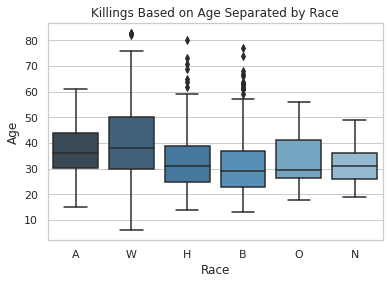

In [19]:
x = post_clean.groupby('race')
print(x['age'].mean())
sns.boxplot(x='race', y='age', data=post_clean, palette='Blues_d')
plt.xlabel("Race")
plt.ylabel("Age")
plt.title("Killings Based on Age Separated by Race")

What this boxplot is illustrating is the information that was previously looked at earlier only this time separated by race. Above this graph we can see the mean for each race. All of the races are consistently in there 30's and all of them being in the early 30's with the exception of the White population that had there mean centered around late 30's. From the graph it looks like the race with the most range of killings is the White population who looks to have the min and max values of our dataset. The Asian, Hispanic and Black population look very close together. The Native American population seems to have the least amount of range having the people killed by police being between late teens and late 40's. 

# Unarmed Killings by Race


Now that we have taken a general look at the killings by race we will now analyze killings based off some different columns. More specifically in this section we will be looking at unarmed killings by race. Again the races are as follows:

* A -- Asian population
* B -- Black population
* H -- Hispanic population
* N -- Native American population
* O -- Other population
* W -- White Population

In [20]:
post_clean['unarmedrace'] = post_clean.armed.str.contains('unarmed', na=False)
postunarm = post_clean.groupby('race').unarmedrace.sum()
postunarm

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


race
A     0
B    56
H    29
N     2
O     4
W    60
Name: unarmedrace, dtype: int64

This shows how many people by each race were killed by police while unarmed. The Black population in this two year span had 59 unarmed people killed by police and the White population had 60 unarmed people killed by police. It is interesting to see that the Asian population had 0 unarmed people killed by police. Now that we have general information on citizens killed while unarmed we will start calculating the rates.

In [21]:
orp = {'White':[60/248410000], 'Black':[56/42970000], 'Hispanic':[29/60570000], 'Asian': [0/18280000], 'Native American': [2/4050000]}
orpp = pd.DataFrame(data=orp)
orpp

,White,Black,Hispanic,Asian,Native American
0,2.415362e-07,0.000001,4.787849e-07,0.0,4.938272e-07


Again we will look at this in terms of a big population since these decimals dont illustrate a whole lot. To better visualize the rate of unarmed killings we will just make projections for the White population in 2016 like we did in the above section.

In [22]:
tur = {'Race': ['White', 'Black', 'Hispanic', 'Asian', 'Native American'],'WhitePop' : [60, 248, 119, 0, 123]}
tur1 = pd.DataFrame(tur, columns=['Race','WhitePop'])

In [23]:
gen2_data = [['White', 60], ['Black', 248], ['Hispanic', 119], ['Asian', 0], ['Native American', 123]]
pd.DataFrame(gen2_data, columns=["Race", "Unarmed Killed Based Off Rates (For 248,410,000 people)"])

,Race,"Unarmed Killed Based Off Rates (For 248,410,000 people)"
0,White,60
1,Black,248
2,Hispanic,119
3,Asian,0
4,Native American,123


Unarmed Black citizens are being killed twice as much as the Hispanic or Native American population and four times as much as the White population. The Hispanic and Native American population also have a fairly high rate of unarmed citizens being killed.

Text(0.5, 1.0, 'Rate of Killing of Unarmed Citizens by Police')

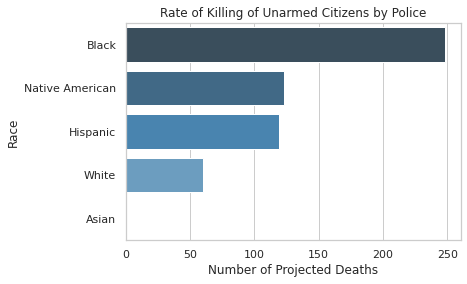

In [24]:
sns.set(style='whitegrid')
ax = sns.barplot(data=tur1, y='Race', x='WhitePop', palette="Blues_d", order= tur1.sort_values('WhitePop', ascending=False).Race)
plt.xlabel("Number of Projected Deaths")
plt.title("Rate of Killing of Unarmed Citizens by Police")

# Not Fleeing Suspects Killed by Race

In [25]:
a = post_clean['flee'].describe()
b = post_clean['flee'].unique()
print(a, b)

count            1986
unique              4
top       Not fleeing
freq             1358
Name: flee, dtype: object ['Not fleeing' 'Car' 'Foot' 'Other']


In [26]:
print("Proportion of People Killed While Not Fleeing:", (1358/1986)*100,"%")

Proportion of People Killed While Not Fleeing: 68.37865055387714 %


From above we can see that there are four different classifications in the 'flee' category. These are Not fleeing, Car, Foot, and Other. We can see that the Not fleeing classification occurred 1358 times which makes up for 68% of the dataset. To make our analysis easier to do we will make a new column called 'fleeornot' that has two unique values, "Not Fleeing" or "Flee".

In [27]:
post_clean = post_clean.assign(fleeornot = post_clean['flee'])

In [28]:
post_clean.loc[post_clean['flee']== 'Not fleeing', 'fleeornot'] = 'Not Fleeing'
post_clean.loc[post_clean['flee']== 'Car', 'fleeornot'] = 'Flee'
post_clean.loc[post_clean['flee']== 'Foot', 'fleeornot'] = 'Flee'
post_clean.loc[post_clean['flee']== 'Other', 'fleeornot'] = 'Flee'

In [29]:
post_clean.fleeornot.unique()

array(['Not Fleeing', 'Flee'], dtype=object)

In [30]:
post_clean['fleesornot'] = post_clean.fleeornot.str.contains('Not Fleeing', na=False)
postflee = post_clean.groupby('race').fleesornot.sum()
postflee

race
A     26
B    320
H    235
N     19
O     21
W    737
Name: fleesornot, dtype: int64

From here we are able to get totals for the amount of people that were killed not fleeing the police by race. From the numbers above the amount of White citizens that were killed while not fleeing accounted for over half of all those killed. The Black population also has a high number as well as the Hispanic population. Like above we determined that the amount of people not fleeing accounted for a little over 68% of the whole dataset, so in the next section we will be looking at how this factors in to those who were also unarmed. For now another chart was made below to illustrate fleeing vs. non-fleeing deaths. After we will continue looking at trends by looking at the rates at which each race is being killed at.

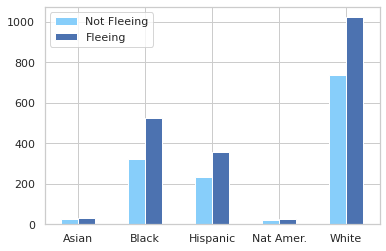

In [31]:
#Want a stacked bar chart of Not Fleeing vs. Fleeing Right Here
x = [26, 320, 235, 19, 737]
y = [32, 523, 355, 26, 1022]
index = ['Asian', 'Black', 'Hispanic', 'Nat Amer.', 'White']
df = pd.DataFrame({'Not Fleeing': x,
                   'Fleeing': y}, index=index)
ax = df.plot.bar(rot=0, color={"Not Fleeing": "lightskyblue", "Fleeing": "b"})

Each race looks to be getting killed more by fleeing than by not fleeing. The distance between fleeing and not fleeing seem especially distant in the black population, hispanic population and the white population, but this could also just be because there are more murders in each of those races in general. Lets obtain the valuable data within this section which is the rate.

In [32]:
dfr = {'White':[737/248410000], 'Black':[320/42970000], 'Hispanic':[235/60570000], 'Asian': [26/18280000], 'Native American': [19/4050000]}
dfrr = pd.DataFrame(data=dfr)
dfrr

,White,Black,Hispanic,Asian,Native American
0,0.000003,0.000007,0.000004,0.000001,0.000005


It looks like the Black population has the highest rate for those killed while not fleeing. The Asian population has the lowest rate and the other rates are close together in between the black and asian population rates.

In [33]:
tur2 = {'Race': ['White', 'Black', 'Hispanic', 'Asian', 'Native American'],'WhitePop' : [737, 1739, 994, 248, 1242]}
tur3 = pd.DataFrame(tur2, columns=['Race','WhitePop'])

In [34]:
gen3_data = [['White', 737], ['Black', 1739], ['Hispanic', 994], ['Asian', 248], ['Native American', 1242]]
pd.DataFrame(gen3_data, columns=["Race", "Unarmed Killed Based Off Rates (For 248,410,000 people)"])

,Race,"Unarmed Killed Based Off Rates (For 248,410,000 people)"
0,White,737
1,Black,1739
2,Hispanic,994
3,Asian,248
4,Native American,1242


Text(0.5, 1.0, 'Rate of Killing of Non-Fleeing Citizens (Based on White Pop.)')

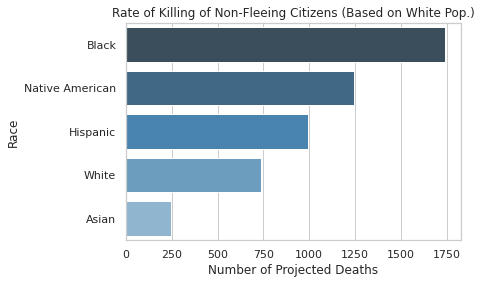

In [35]:
sns.set(style='whitegrid')
ax = sns.barplot(data=tur3, y='Race', x='WhitePop', palette="Blues_d", order= tur3.sort_values('WhitePop', ascending=False).Race)
plt.xlabel("Number of Projected Deaths")
plt.title("Rate of Killing of Non-Fleeing Citizens (Based on White Pop.)")

This graph gives us a better visual of what is going on, and we are starting to see a similar trend throughout the whole dataset. The Black population has constantly been getting killed at a much higher rate than any other race.

# Not Fleeing and Unarmed Killed by Race

In [36]:
post_clean.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,unarmedrace,fleeornot,fleesornot
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,False,Not Fleeing,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,False,Not Fleeing,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,True,Not Fleeing,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,False,Not Fleeing,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,False,Not Fleeing,True


In [37]:
twogether = post_clean[(post_clean['flee'] == 'Not fleeing') & (post_clean['armed'] == 'unarmed')]
unarmflee = twogether.groupby('race').sum()
unarmflee

,id,age,signs_of_mental_illness,body_camera,unarmedrace,fleesornot
race,,,,,,
B,26409,912.0,9,5,29,29
H,18396,587.0,4,3,19,19
O,1804,89.0,1,1,3,3
W,44609,1282.0,10,5,39,39


This chart is a little messy, but it can be broken down very fast. Out of all of the people that were unarmed and were not fleeing there were 24 with signs of mental illness and 14 total were killed while the officer had a body camera. For our analytical purposes we are worried about the last two columns which come to the same conclusion. There were 29 black citizens, 19 hispanic citizens, and 39 white citizens that were killed by police while they were unarmed and not fleeing. A total of the 90 out of almost 2000 killings were done to people who were unarmed and not fleeing. 

In [38]:
wbh = {'White':[39/248410000], 'Black':[29/42970000], 'Hispanic':[19/60570000]}
wbhh = pd.DataFrame(data=wbh)
wbhh

,White,Black,Hispanic
0,1.569985e-07,6.748895e-07,3.136866e-07


In [39]:
tur4 = {'Race': ['White', 'Black', 'Hispanic'],'WhitePop' : [39, 168, 78]}
tur5 = pd.DataFrame(tur4, columns=['Race','WhitePop'])

In [40]:
gen4_data = [['White', 39], ['Black', 168], ['Hispanic', 78]]
pd.DataFrame(gen4_data, columns=["Race", "Unarmed Killed Based Off Rates (For 248,410,000 people)"])

,Race,"Unarmed Killed Based Off Rates (For 248,410,000 people)"
0,White,39
1,Black,168
2,Hispanic,78


Again we are able to see a constant trend that the black population rate is two times that of the hispanic population and four times the rate of the white population. Consistently, the more and more we break columns down the more we see similar trends.

Text(0.5, 1.0, 'Rate of Killing of Unarmed Non-Fleeing Citizens (Based on White Pop.)')

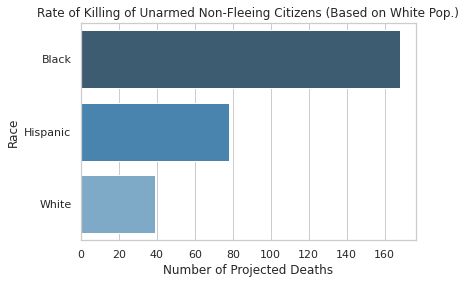

In [41]:
sns.set(style='whitegrid')
ax = sns.barplot(data=tur5, y='Race', x='WhitePop', palette="Blues_d", order= tur5.sort_values('WhitePop', ascending=False).Race)
plt.xlabel("Number of Projected Deaths")
plt.title("Rate of Killing of Unarmed Non-Fleeing Citizens (Based on White Pop.)")

# Conclusion

In conclusion, by taking a thorough look through the race column it can be seen that there is a consistent trend going on. In all of the sections we looked at the rate was almost twice as high for the black population. If the numbers were closer it could maybe be interpreted that it is just random chance differences, but when all of the rates are consistently that high for the black population then questions need to start being asked.